In [88]:
import numpy as np
import pandas as pd 
from sklearn import linear_model

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import os
import tempfile
import typing
import s3fs
import tempfile
import geopandas as gpd

In [89]:
pip install GitPython

Note: you may need to restart the kernel to use updated packages.


In [90]:
#Récupération de la base de données
df = pd.read_csv("Base_WS_traitée 2.csv")
print(df.shape)

(9012, 10)


In [91]:
df.head()

,Unnamed: 0,date_mutation,valeur_fonciere,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,code_postal,prixm2
0,0,29/06/2022,740000,Appartement,76,3,2.257874,48.839415,16,9736.842105
1,1,28/06/2022,598000,Appartement,54,2,2.260871,48.838515,16,11074.074074
2,2,28/06/2022,620874,Appartement,85,3,2.257995,48.837945,16,7304.400000
3,3,23/06/2022,230000,Appartement,30,2,2.260568,48.838470,16,7666.666667
4,4,17/06/2022,1380000,Appartement,141,5,2.256915,48.839126,16,9787.234043


In [92]:
df = df.rename(columns = {'prixm2': 'Prix au m²','code_postal':'Arrondissement', 'surface_reelle_bati':'Surface en m²', 'valeur_fonciere':'Valeur du bien'})
df = df.drop(columns = {'latitude', 'longitude'})
df.head()

,Unnamed: 0,date_mutation,Valeur du bien,type_local,Surface en m²,nombre_pieces_principales,Arrondissement,Prix au m²
0,0,29/06/2022,740000,Appartement,76,3,16,9736.842105
1,1,28/06/2022,598000,Appartement,54,2,16,11074.074074
2,2,28/06/2022,620874,Appartement,85,3,16,7304.400000
3,3,23/06/2022,230000,Appartement,30,2,16,7666.666667
4,4,17/06/2022,1380000,Appartement,141,5,16,9787.234043


In [93]:
sns.set(rc={'figure.figsize':(16,8.27)})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Surface en m²', ylabel='Valeur du bien'>

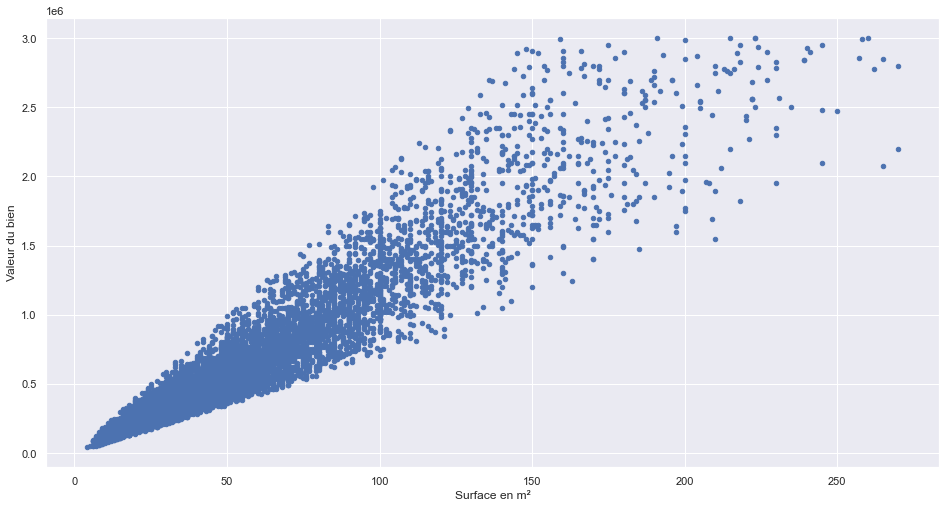

In [105]:
#réalisation nuage de points 

df.plot.scatter(x='Surface en m²',y='Valeur du bien')

<AxesSubplot:ylabel='Arrondissement'>

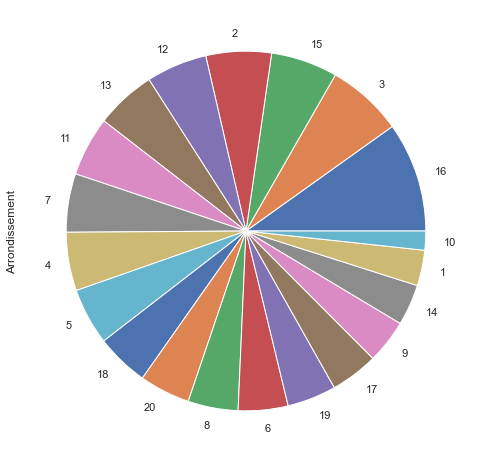

In [106]:
#Diagramme circulaire présentant la fréquence de vente immobilières par arrondissement 

df["Arrondissement"].value_counts(normalize=True).plot(kind='pie')


In [96]:
df1 = df.drop(columns =['Unnamed: 0'])

Text(0.5, 1.0, 'Matrice de corrélation entre les différentes caractéristiques des annonces\n')

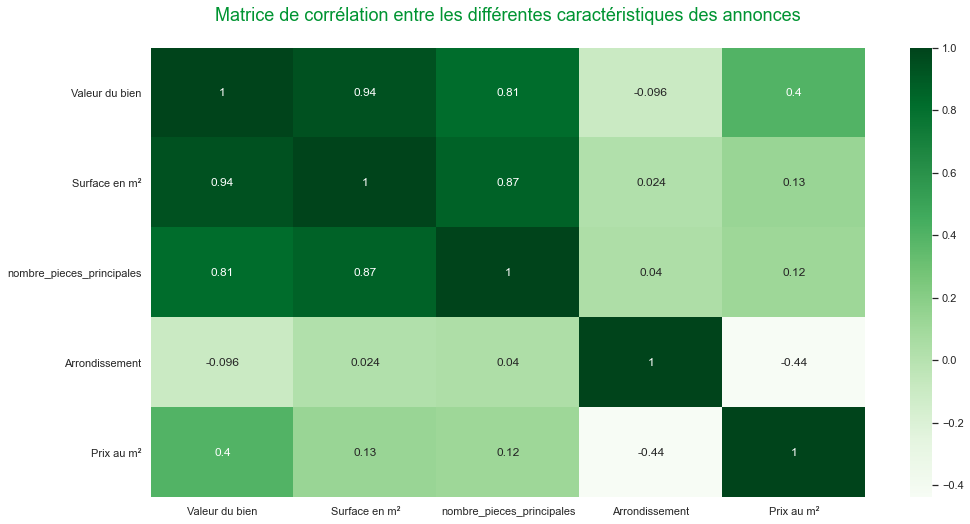

In [107]:
#Réalisation d'une matrice de corrélation 
sns.heatmap(df1.corr(), annot=True, cmap='Greens')
plt.title("Matrice de corrélation entre les différentes caractéristiques des annonces\n", fontsize=18, color='#009432')

In [98]:
prix = df[['Prix au m²','Arrondissement']].groupby('Arrondissement').mean().round().sort_values(by='Prix au m²', ascending=False)
prix.reset_index(0, inplace=True)
prix.head()

,Arrondissement,Prix au m²
0,6,14476.0
1,7,14153.0
2,1,13381.0
3,4,13105.0
4,5,12850.0


In [99]:
nbr = df[['Valeur du bien','Arrondissement']].groupby('Arrondissement').count().sort_values(by='Valeur du bien', ascending=False)
nbr.reset_index(0, inplace=True)
nbr.rename(columns={'Valeur du bien':'Nb_annonces'}, inplace=True)
nbr.head(22)

,Arrondissement,Nb_annonces
0,16,890
1,3,617
2,15,540
3,2,530
4,12,493
5,13,490
6,11,482
7,4,474
8,7,474
9,5,460


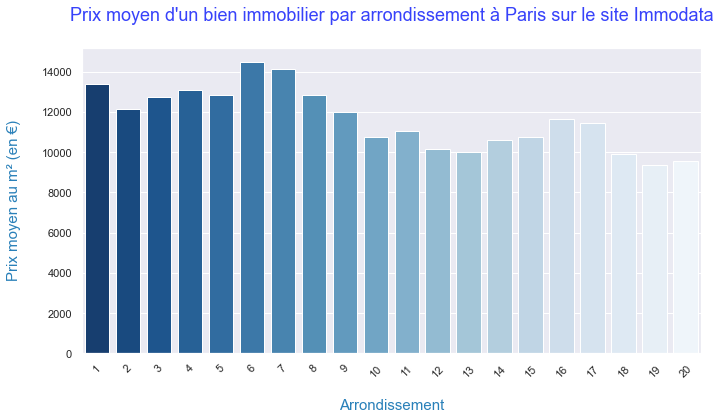

In [109]:
#Diagramme en barre présentant le prix moyen des biens (en m²) par arrondissement
plt.figure(figsize=(10,6))
sns.barplot(x=prix['Arrondissement'], y=prix['Prix au m²'], palette="Blues_r")
plt.xlabel('\nArrondissement', fontsize=15, color='#2980b9')
plt.ylabel('Prix moyen au m² (en €)\n', fontsize=15, color='#2980b9')
plt.title("Prix moyen d'un bien immobilier par arrondissement à Paris sur le site Immodata\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()

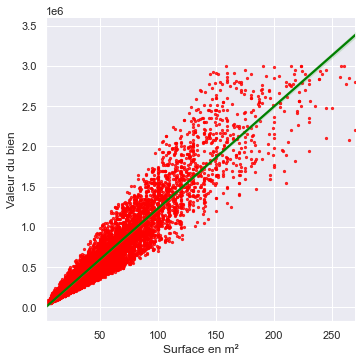

In [101]:
sns.lmplot(x = 'Surface en m²', y = 'Valeur du bien', data = df, scatter_kws = {'s': 5, 'color': 'red'}, line_kws = {'color': 'green'})

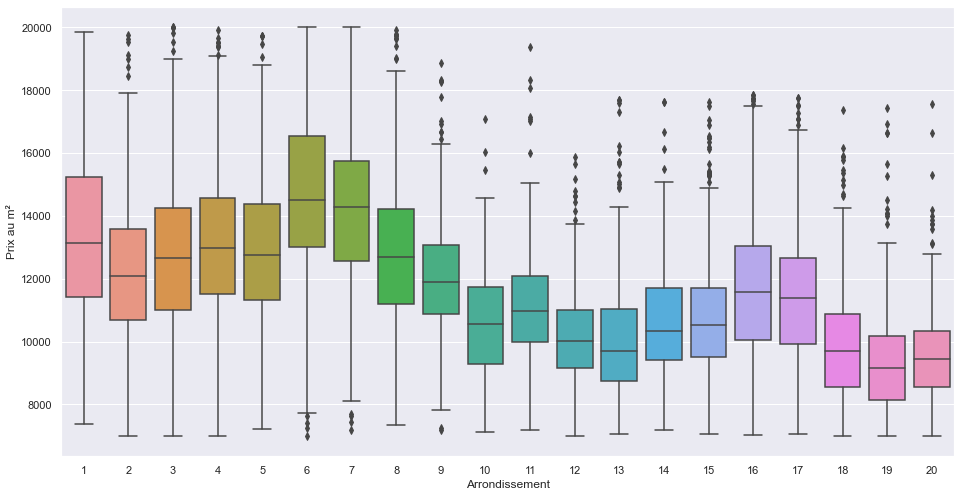

In [111]:
#Boite à moustache représentant la repartition des prix de vente (en m²) pour chaque arrondissement
ax = sns.boxplot(x="Arrondissement", y='Prix au m²', data=df, orient="v")

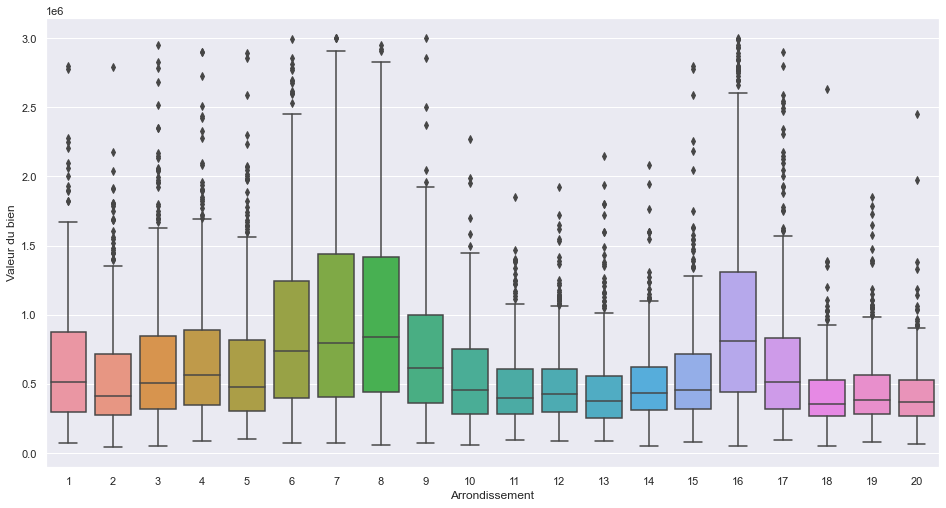

In [112]:
#Boite à moustache représentant la repartition des prix de vente pour chaque arrondissement
ax = sns.boxplot(x="Arrondissement", y='Valeur du bien', data=df, orient="v")

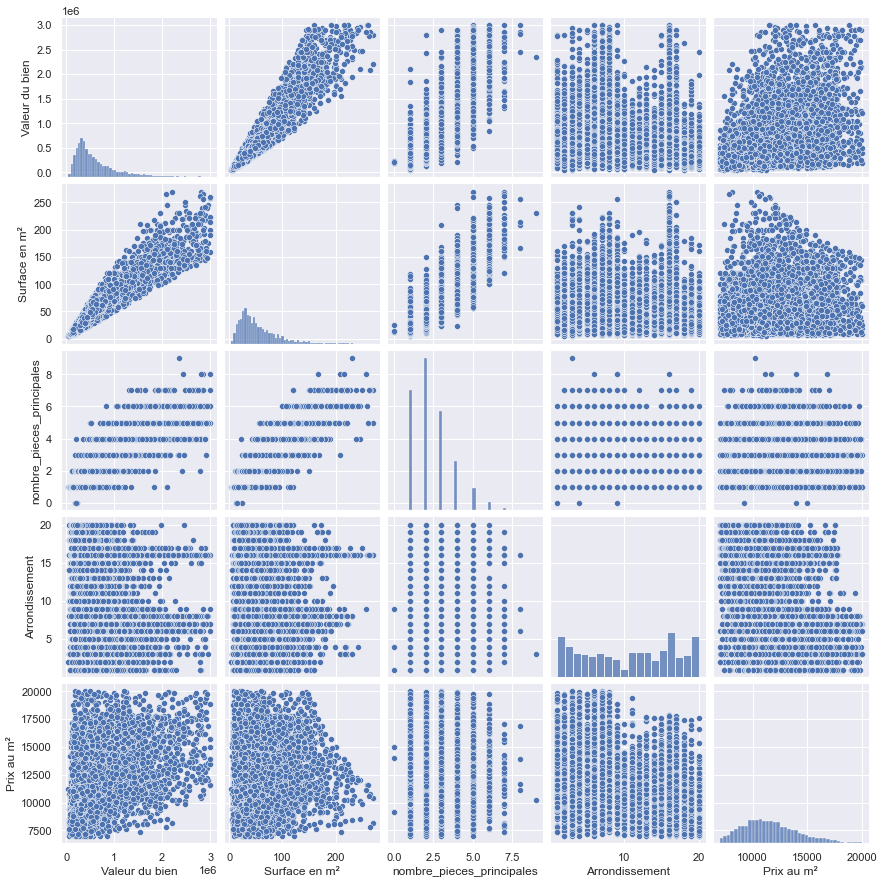

In [104]:
sns.pairplot(df1)